In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Synthetic_Graduate_Admissions.csv")
X = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
y = data['Chance of Admit']

In [3]:
data.head()

,Student_ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,STU1000,301,101,4,2.4,1.6,8.10,1,0.817
1,STU1001,313,95,3,2.4,1.1,8.82,0,0.749
2,STU1002,316,90,4,4.6,1.7,8.36,1,0.803
3,STU1003,321,111,5,1.3,1.4,8.94,0,0.757
4,STU1004,313,99,5,1.5,3.3,8.32,0,0.796


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [5]:
models = {
    "Linear": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

In [11]:
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = round(r2_score(y_test, y_pred), 3)
    print(f"{name}: R²={scores[name]}")

Linear: R²=0.71
DecisionTree: R²=0.261
RandomForest: R²=0.644
SVR: R²=0.515
KNN: R²=0.622


In [12]:
sample = scaler.transform([[320,110,4,4.5,4,9,1]])
print("\nPredicted admission chance:")
for name, model in models.items():
    print(f"{name}: {model.predict(sample)[0]*100:.2f}%")


Predicted admission chance:
Linear: 90.04%
DecisionTree: 90.40%
RandomForest: 89.33%
SVR: 87.67%
KNN: 89.12%


c:\Users\zinju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


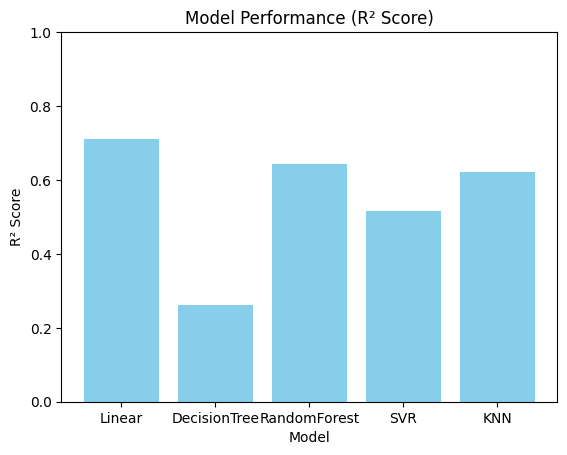

In [13]:
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.title("Model Performance (R² Score)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

In [14]:
#--------------------END--------------------#